# Data on the Blockchain
In this report we look into how we can exract data from the blockchain

In [4]:
from dotenv import load_dotenv
import os
import requests
import pandas as pd

load_dotenv()
api_key = os.getenv("DUNE_API_KEY")
print(api_key)


H4CQhpfpXV6MORFhe6qySV3JwonVb2sp


C:\Users\shoge\AppData\Local\Temp\ipykernel_33896\3479322154.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Getting Data using Dune analytics

Dune Analytics offers a comprehensive and accessible platform for extracting and analyzing blockchain data. For our purpose, we are focusing on AAVE staking, utilizing the insights provided by the [AAVE Staking Dashboard created by KARTOD](https://dune.com/KARTOD/AAVE-Staking). This dashboard presents a rich set of data points including staking rewards, total value locked (TVL) in staking, number of stakers, and other relevant metrics.


In [16]:
stkAAVE_cumulative_stake = requests.get(f'https://api.dune.com/api/v1/query/155127/results?api_key={api_key}').json()

In [17]:
cum_stkAAVE_df = pd.DataFrame( stkAAVE_cumulative_stake['result']['rows'])
cum_stkAAVE_df.index = pd.to_datetime(cum_stkAAVE_df['day'])
cum_stkAAVE_df = cum_stkAAVE_df.sort_index()
print(cum_stkAAVE_df.head())


                           aave_price    aave_reward       apy   apy_now  \
day                                                                        
2022-01-17 00:00:00+00:00  231.241806  127182.993056  0.067288  6.728832   
2022-01-18 00:00:00+00:00  231.281736  127204.954861  0.066891  6.689135   
2022-01-19 00:00:00+00:00  220.059549  121032.751736  0.066883  6.688272   
2022-01-20 00:00:00+00:00  213.825937  117604.265625  0.066933  6.693310   
2022-01-21 00:00:00+00:00  186.292847  102461.065972  0.066961  6.696107   

                           cumulative_staked                          day  \
day                                                                         
2022-01-17 00:00:00+00:00       2.983430e+06  2022-01-17 00:00:00.000 UTC   
2022-01-18 00:00:00+00:00       3.001135e+06  2022-01-18 00:00:00.000 UTC   
2022-01-19 00:00:00+00:00       3.001523e+06  2022-01-19 00:00:00.000 UTC   
2022-01-20 00:00:00+00:00       2.999264e+06  2022-01-20 00:00:00.000 UTC   
2022-

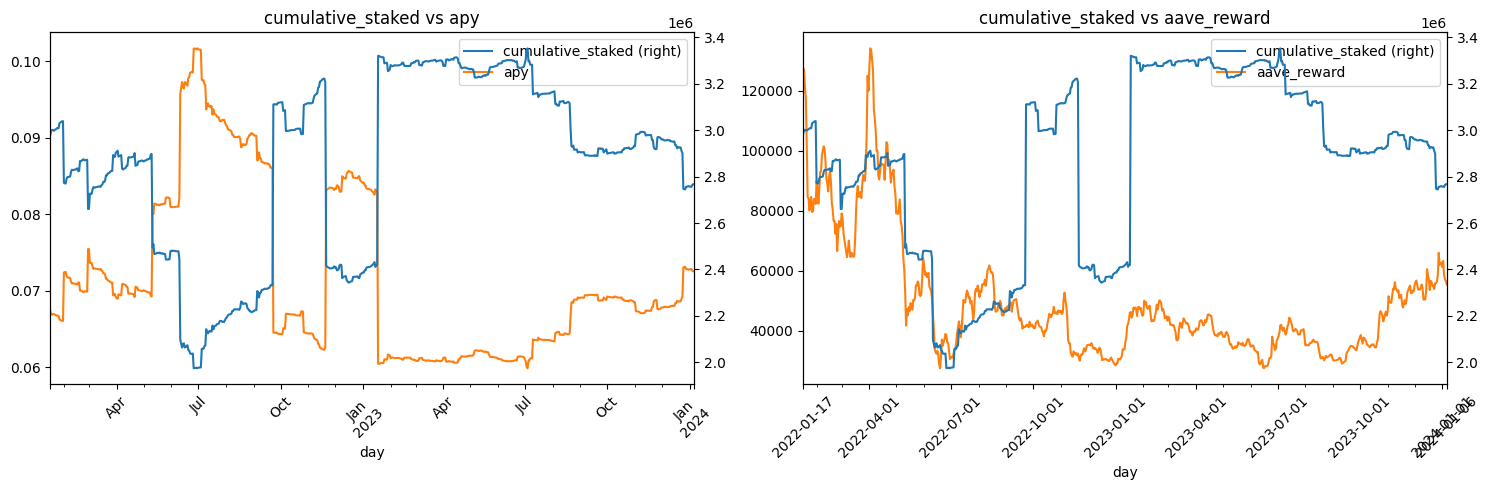

In [18]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

cum_stkAAVE_df[['cumulative_staked', 'apy']].plot(ax=axes[0], secondary_y=['cumulative_staked'])
axes[0].set_title('cumulative_staked vs apy')
axes[0].tick_params(axis='x', rotation=45)  # Rotate X axis labels
# axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

cum_stkAAVE_df[['cumulative_staked', 'aave_reward']].plot(ax=axes[1], secondary_y=['cumulative_staked'])
axes[1].set_title('cumulative_staked vs aave_reward')
axes[1].tick_params(axis='x', rotation=45)  # Rotate X axis labels
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.tight_layout()
plt.show()